In [2]:
import pandas as pd
import numpy as np
import os

In [16]:
res_dict = {}
dates = ['061923']
models = ['rf', 'xgb', 'nn']
for date in dates:
    for model in models:
        try:
            res_dict[str(model)+'_'+str(date)] = pd.read_csv(f'../results/runs/pdx/res_{model}_{date}.csv', index_col=0)
        except:
            pass

In [17]:
res_dict['rf_061923'].head()

,pretrain,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci
0,crc,OS,mut,0.375813,0.475766,0.43340675720705857-0.5181259685593043,0.468946,0.426618591669851-0.5112737379599012
0,crc,OS,act,0.728696,0.499586,0.4571763178640752-0.5419951817216746,0.552446,0.5102701839696007-0.5946211892103526
0,crc,PFS,comb,0.697039,0.548019,0.5048635500925515-0.5911737459447447,0.594200,0.5516210400121317-0.636779244522288
0,crc,PFS,act,0.728696,0.510023,0.46667652399402065-0.5533700960525995,0.569563,0.5266293814305064-0.612497081179381
0,crc,OS,comb,0.696042,0.442109,0.3999843100925804-0.48423275701595314,0.458925,0.4166586095598663-0.5011908086059728


In [18]:
#for each model type, concat the results from the two dates, unless there is only one date
for model in models:
    try:
        res_dict[model] = pd.concat([res_dict[model+'_'+dates[0]], res_dict[model+'_'+dates[1]]])
        res_dict[model]['model'] = model
        del res_dict[model+'_'+dates[0]]
        del res_dict[model+'_'+dates[1]]
    except:
        res_dict[model] = res_dict[model+'_'+dates[0]]
        res_dict[model]['model'] = model
        del res_dict[model+'_'+dates[0]]

In [19]:
res_comb = pd.concat(res_dict.values())
res_comb.head()

,pretrain,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
0,crc,OS,mut,0.375813,0.475766,0.43340675720705857-0.5181259685593043,0.468946,0.426618591669851-0.5112737379599012,rf
0,crc,OS,act,0.728696,0.499586,0.4571763178640752-0.5419951817216746,0.552446,0.5102701839696007-0.5946211892103526,rf
0,crc,PFS,comb,0.697039,0.548019,0.5048635500925515-0.5911737459447447,0.594200,0.5516210400121317-0.636779244522288,rf
0,crc,PFS,act,0.728696,0.510023,0.46667652399402065-0.5533700960525995,0.569563,0.5266293814305064-0.612497081179381,rf
0,crc,OS,comb,0.696042,0.442109,0.3999843100925804-0.48423275701595314,0.458925,0.4166586095598663-0.5011908086059728,rf


In [20]:
res_comb.sort_values(by='test_auroc_mean', ascending=False, inplace=True)
res_comb.head()

,pretrain,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
0,crc,PFS,mut,0.374993,0.586014,0.5433048284840465-0.6287231435439256,0.639981,0.5983589976765777-0.6816025277280886,rf
0,total,PFS,mut,0.430534,0.572727,0.5298328627823428-0.6156216826722027,0.688036,0.6478629738920818-0.7282085710676625,rf
0,total,PFS,mut,0.563764,0.567366,0.5244057806530074-0.6103261540789273,0.606090,0.5637213764446867-0.6484580273378517,xgb
0,crc,PFS,comb,0.697039,0.548019,0.5048635500925515-0.5911737459447447,0.594200,0.5516210400121317-0.636779244522288,rf
0,crc,PFS,act,0.678158,0.541026,0.49781633257618807-0.5842349494750939,0.610829,0.568551582604524-0.6531056133563555,nn


In [21]:
#if there are duplicates in drug + outcome + data_type, keep the one with the highest test_auroc_mean
res_comb.drop_duplicates(subset=['outcome', 'data_type', 'model'], keep='first', inplace=True)
res_comb.head()

,pretrain,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
0,crc,PFS,mut,0.374993,0.586014,0.5433048284840465-0.6287231435439256,0.639981,0.5983589976765777-0.6816025277280886,rf
0,total,PFS,mut,0.563764,0.567366,0.5244057806530074-0.6103261540789273,0.606090,0.5637213764446867-0.6484580273378517,xgb
0,crc,PFS,comb,0.697039,0.548019,0.5048635500925515-0.5911737459447447,0.594200,0.5516210400121317-0.636779244522288,rf
0,crc,PFS,act,0.678158,0.541026,0.49781633257618807-0.5842349494750939,0.610829,0.568551582604524-0.6531056133563555,nn
0,total,OS,comb,0.818271,0.514706,0.47231478302380686-0.5570969816820754,0.510968,0.4685689825728689-0.553367465331004,nn


In [22]:

outcomes = ['PFS', 'OS']
res_out = {}

for outcome in outcomes:
    res_out[str(outcome)] = res_comb[(res_comb['outcome'] == outcome)]

In [23]:
data_types = ['comb', 'mut', 'act']

In [24]:
#make a 2x3 grid of bar plots, where row 1 is OS and row 2 is PFS, and columns are data types
#each plot should have two sets of 3 bars, with one set for val_auroc and one set for test_auroc_mean, and a bar for each model type
#each half of the plot should have a subtitle with OS or PFS, and the y-axis should be the same for both halves (AUROC)
#the x-axis will have the labels for validation and test, and the labels for the data types will be in the legend
#the title of the plot will be the drug name (Kinase Inhibitors) and the y-axis will be AUROC
import matplotlib.pyplot as plt
import seaborn as sns

#first create a list of tuples, where each tuple is a combination of outcome and data type
#then we can iterate through this list to create the plots
outcomes = ['OS', 'PFS']
data_types = ['comb', 'mut', 'act']
comb = [(x, y) for x in outcomes for y in data_types]

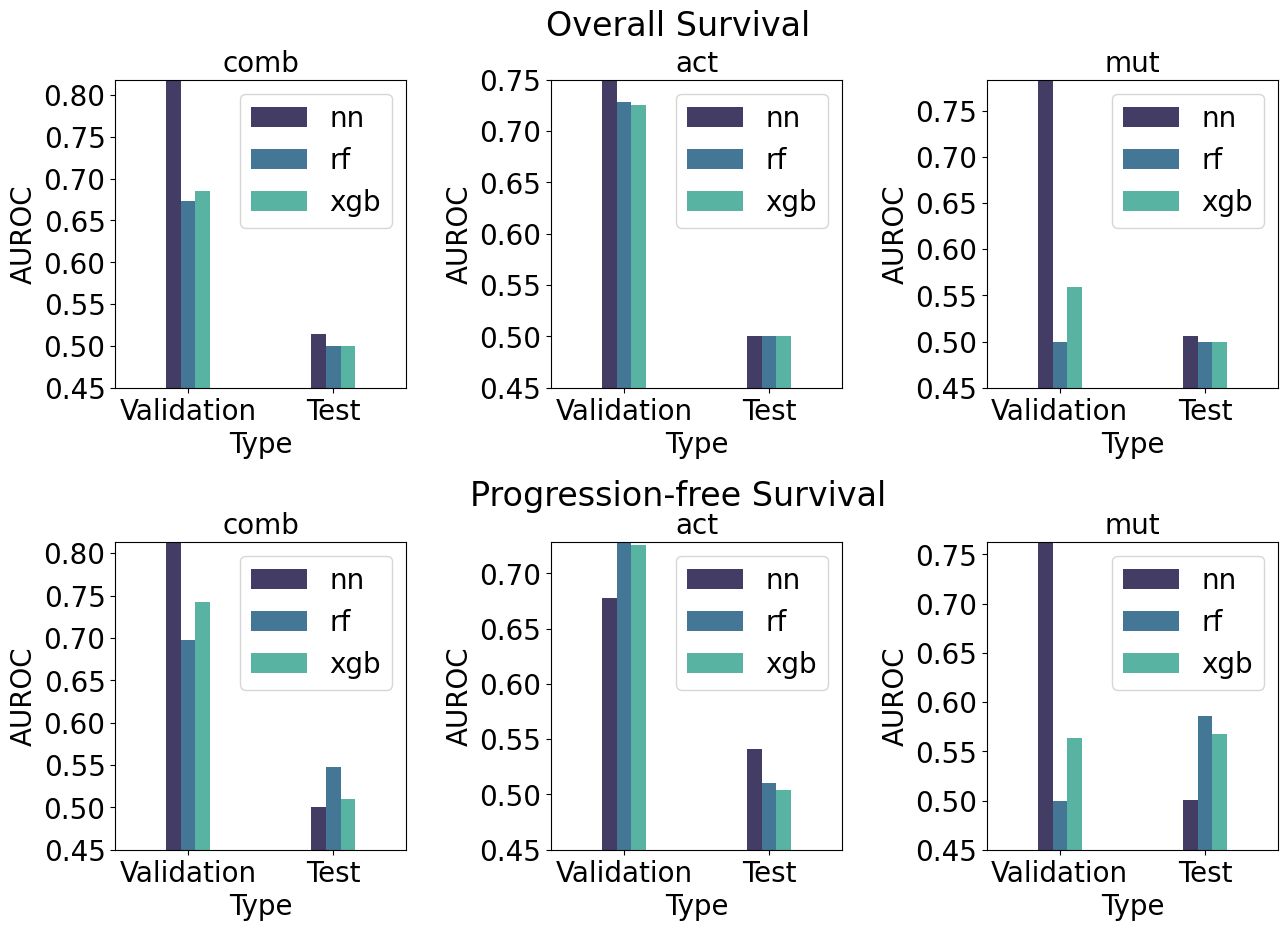

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, data_type in enumerate(['comb', 'act', 'mut', 'comb', 'act', 'mut']):
    if i < 3:
        res_data = res_comb.loc[(res_comb['outcome'] == 'OS') & (res_comb['data_type'] == data_type)]
        res_data = res_data[['model', 'val_auroc', 'test_auroc_mean']]
        ymax = max(res_data['val_auroc'].max(), res_data['test_auroc_mean'].max())
        res_data.columns = ['Model', 'Validation', 'Test']
        #make all data <0.5 equal to 0.5
        res_data['Validation'] = res_data['Validation'].apply(lambda x: 0.5 if x < 0.5 else x)
        res_data['Test'] = res_data['Test'].apply(lambda x: 0.5 if x < 0.5 else x)
        res_data = res_data.melt(id_vars='Model', var_name='Type', value_name='AUROC')
        #make the size of the bars narrower
        ax = ax.flatten()
        #sort the data by model type
        res_data.sort_values(by='Model', inplace=True)
        sns.barplot(x='Type', y='AUROC', hue='Model', data=res_data, errorbar=None, ax=ax[i], palette='mako', width=0.3)
        
        ax[i].set_title(f'{data_type}')
        ax[i].set_ylim(0.45, ymax)
        #make the font bigger
        for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] + ax[i].get_xticklabels() + ax[i].get_yticklabels()):
                item.set_fontsize(20)
        ax[i].legend(fontsize=20)
    elif i >= 3:
        res_data = res_comb.loc[(res_comb['outcome'] == 'PFS') & (res_comb['data_type'] == data_type)]
        res_data = res_data[['model', 'val_auroc', 'test_auroc_mean']]
        ymax = max(res_data['val_auroc'].max(), res_data['test_auroc_mean'].max())
        res_data.columns = ['Model', 'Validation', 'Test']
        #make all data <0.5 equal to 0.5
        res_data['Validation'] = res_data['Validation'].apply(lambda x: 0.5 if x < 0.5 else x)
        res_data['Test'] = res_data['Test'].apply(lambda x: 0.5 if x < 0.5 else x)
        res_data = res_data.melt(id_vars='Model', var_name='Type', value_name='AUROC')
        #make the size of the bars narrower
        ax = ax.flatten()
        #sort the data by model type
        res_data.sort_values(by='Model', inplace=True)
        sns.barplot(x='Type', y='AUROC', hue='Model', data=res_data, errorbar=None, ax=ax[i], palette='mako', width=0.3)
        ax[i].set_title(f'{data_type}')
        ax[i].set_ylim(0.45, ymax)
        #make the font bigger
        for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] + ax[i].get_xticklabels() + ax[i].get_yticklabels()):
                item.set_fontsize(20)
        ax[i].legend(fontsize=20)
plt.figtext(0.5,0.95, "Overall Survival", ha="center", va="top", fontsize=24, color="black")      
plt.figtext(0.5,0.48, "Progression-free Survival", ha="center", va="top", fontsize=24, color="black")
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.savefig('../results/figures/pdx_ki_os_pfs_061923.png', dpi=300, bbox_inches='tight')